### Import Libraries

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

### Membaca Dataset

In [16]:
df = pd.read_csv('Dataset/clean_data.csv', encoding='utf-8')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8


In [17]:
filter = df.query('StockCode == "M" or StockCode == "POST" or StockCode == "D" and Description == "POSTAGE" or Description == "Manual" or Description == "Discount"')
filter

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour
45,536370,POST,POSTAGE,3.0,2010-12-01 08:45:00,18.00,12583.0,France,2010,12,1,8
140,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,1,9
384,536403,POST,POSTAGE,1.0,2010-12-01 11:27:00,15.00,12791.0,Netherlands,2010,12,1,11
1116,536527,POST,POSTAGE,1.0,2010-12-01 13:04:00,18.00,12662.0,Germany,2010,12,1,13
1678,536569,M,Manual,1.0,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,2010,12,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
402771,581494,POST,POSTAGE,2.0,2011-12-09 10:13:00,18.00,12518.0,Germany,2011,12,9,10
402818,C581499,M,Manual,-1.0,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,9,10
403004,581570,POST,POSTAGE,1.0,2011-12-09 11:59:00,18.00,12662.0,Germany,2011,12,9,11
403041,581574,POST,POSTAGE,2.0,2011-12-09 12:09:00,18.00,12526.0,Germany,2011,12,9,12


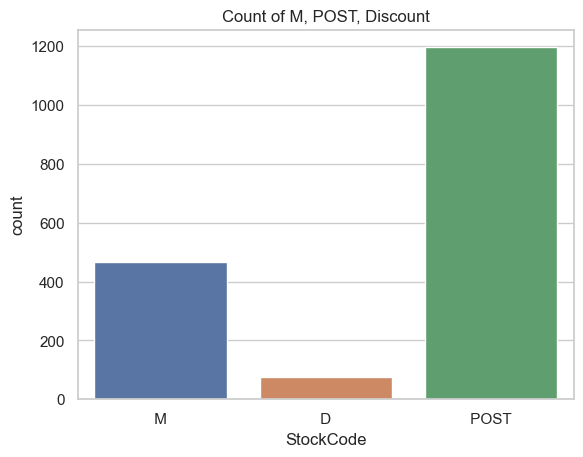

In [18]:
M = df[df['StockCode']=='M'].value_counts().sum()
D = df[df['StockCode']=='D'].value_counts().sum()
POST = df[df['StockCode']=='POST'].value_counts().sum()

#toframe
df1 = pd.DataFrame({'StockCode':[' M ',' D ', ' POST '], 'count':[M, D, POST]})

#plot
sns.barplot(x='StockCode', y='count', data=df1)
plt.title("Count of M, POST, Discount")
plt.show()  

In [19]:
customer1 = df[(df['CustomerID'] == 12583.0) & ((df['StockCode'] == 'POST') | (df['StockCode'].isna() == False))]
customer1[customer1['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour


In [20]:
customer2 = df[(df['CustomerID'] == 16274.0) & ((df['StockCode'] == 'POST') | (df['StockCode'].isna() == False))]
customer2[customer2['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour
1678,536569,M,Manual,1.0,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,2010,12,1,15
1689,536569,M,Manual,1.0,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,2010,12,1,15


In [21]:
quantity_per_year = df.groupby('year')['Quantity'].sum()

quantity_per_year

year
2010     292544.0
2011    4560502.0
Name: Quantity, dtype: float64

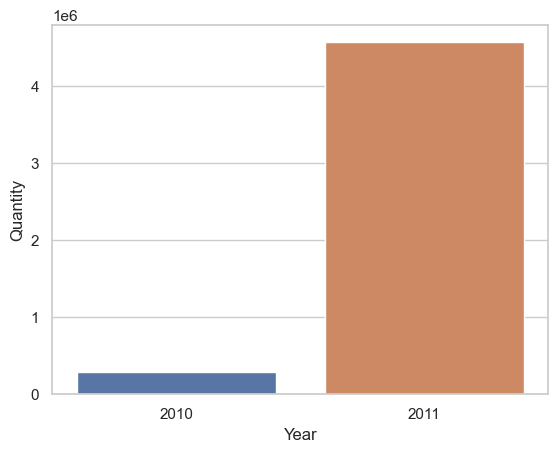

In [22]:
sns.barplot(data=quantity_per_year, x=quantity_per_year.index, y=quantity_per_year.values)
plt.xticks(range(len(quantity_per_year.index)), quantity_per_year.index)

plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

In [23]:
#after_filter = df.drop(filter.index, inplace=True)
#after_filter

In [24]:
desc_per_country = df.groupby('Description')['Country'].value_counts()

#to frame
desc_per_country = desc_per_country.to_frame()
desc_per_country = desc_per_country.reset_index()

#sort
desc_per_country = desc_per_country.sort_values(by=['count'], ascending=False)
desc_per_country

,Description,Country,count
18194,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,1980
13264,REGENCY CAKESTAND 3 TIER,United Kingdom,1574
8149,JUMBO BAG RED RETROSPOT,United Kingdom,1505
1071,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,1343
11030,PARTY BUNTING,United Kingdom,1327
...,...,...,...
10739,PANTRY 3 HOOK ROLLING PIN HANGER,Cyprus,1
10740,PANTRY 3 HOOK ROLLING PIN HANGER,Italy,1
2717,CARAVAN SQUARE TISSUE BOX,Switzerland,1
10743,PANTRY APPLE CORER,Australia,1


In [25]:
top15 = desc_per_country.head(30)
top15

,Description,Country,count
18194,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,1980
13264,REGENCY CAKESTAND 3 TIER,United Kingdom,1574
8149,JUMBO BAG RED RETROSPOT,United Kingdom,1505
1071,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,1343
11030,PARTY BUNTING,United Kingdom,1327
8926,LUNCH BAG RED RETROSPOT,United Kingdom,1185
14719,SET OF 3 CAKE TINS PANTRY DESIGN,United Kingdom,1080
8817,LUNCH BAG BLACK SKULL.,United Kingdom,1069
10885,PAPER CHAIN KIT 50'S CHRISTMAS,United Kingdom,991
9947,NATURAL SLATE HEART CHALKBOARD,United Kingdom,968


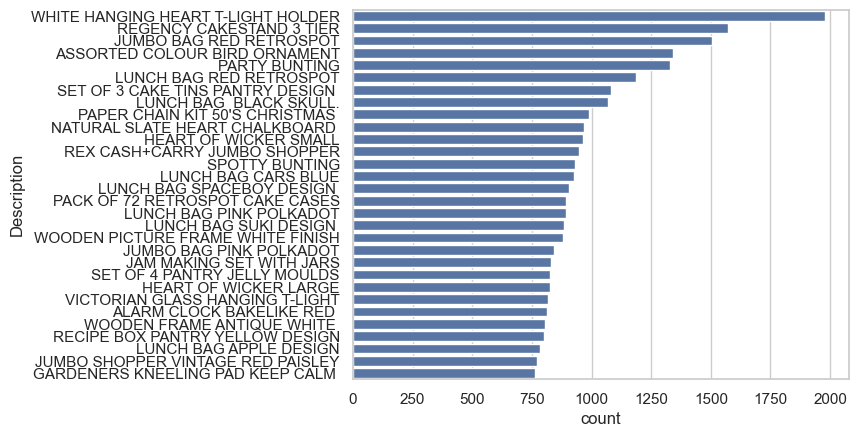

In [26]:
#plot top15
sns.barplot(data=top15, x='count', y='Description', hue='Country')

#legend false
plt.legend([],[], frameon=False)
plt.show()